In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.linalg as spla
import matplotlib
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from numpy import linalg as LA

def gershgorin(A):
    '''Plot Gershgorin disks of A as well as its eigenvalues on the complex plane'''
    n = len(A)
    eval, evec = LA.eig(A)
    patches = []
    # draw discs
    for i in range(n):
        xi = np.real(A[i,i])
        yi = np.imag(A[i,i])
        ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
        circle = Circle((xi, yi), ri)
        patches.append(circle)
    fig, ax = plt.subplots()
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)
    ax.add_collection(p)
    plt.axis('equal')
    for xi, yi in zip(np.real(eval), np.imag(eval)):
        plt.plot(xi, yi,'o')
    plt.xlabel("$Re(\lambda)$")
    plt.ylabel("$Im(\lambda)$")
    plt.show()

### Definition (Gershgorin Disk):

Given a matrix $\boldsymbol{A}\in{\mathbb{R}^{n\times{n}}}$, let $r_{i}=\sum_{j\neq{i}}|a_{ij}|$. We define the Gershgorin disks as
$D_{i}=\{z\in{\mathbb{C}} : |z-a_{ii}|\leq{r_{i}} \},$
i.e. $D_{i}$ is a closed disk in the complex plane centered at $a_{ii}$ with a radius that is the sum of the absolute values of the off-diagonal entries of row $i$ of matrix $\boldsymbol{A}$.

### Gershgorin Circle Theorem:

The eigenvalues $\lambda_1,\ldots,\lambda_n$ of any matrix $\boldsymbol{A}\in{\mathbb{R}^{n\times{n}}}$ are contained in the union of the Gershgorin disks,
$\forall i\in \{1,\ldots, n\}, \quad \lambda_i \in \bigcup_{j=1}^{n}{D_{j}}.$

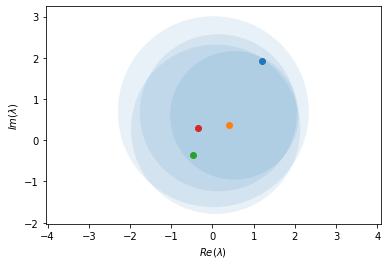

In [2]:
A = np.random.rand(4,4) + 1j * np.random.rand(4,4)
gershgorin(A) # circles are Gershgorin Circles and dots are eigenvalues